🚀 FAST INDIAN FOOD CLASSIFICATION PIPELINE
This code uses ON-THE-FLY augmentation for:
✅ Instant dataset setup (no file creation)
✅ Real-time augmentation during training
✅ RTX 3050 optimized training
✅ Complete evaluation and testing

    🍛 FAST INDIAN FOOD CLASSIFICATION PIPELINE

    ⚡ SPEED ADVANTAGES:
    ✅ Instant setup (no file creation)
    ✅ On-the-fly augmentation during training
    ✅ Real-time image generation
    ✅ Memory efficient approach

    🎯 WHAT IT DOES:
    ✅ Select your dataset folder
    ✅ Create optimized data generators
    ✅ Train EfficientNet with live progress
    ✅ Complete evaluation and testing
    ✅ Save model and visualizations

    ⏰ EXPECTED TIME: 1-3 hours total
    (vs 5-8 hours with file pre-generation)

    🚀 RTX 3050 OPTIMIZED!
    

🎬 Starting FAST Indian Food Classification...

🔧 STEP 1: Setting up RTX 3050 optimizations...
   ✅ Mixed precision enabled (20-30% speedup)
   ✅ XLA optimization enabled

📁 STEP 2: Dataset Selection
   Opening folder

C:\Users\Jay Surieya\AppData\Local\Temp\ipykernel_24972\2984172039.py:187: UserWarning: Glyph 127835 (\N{CURRY AND RICE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


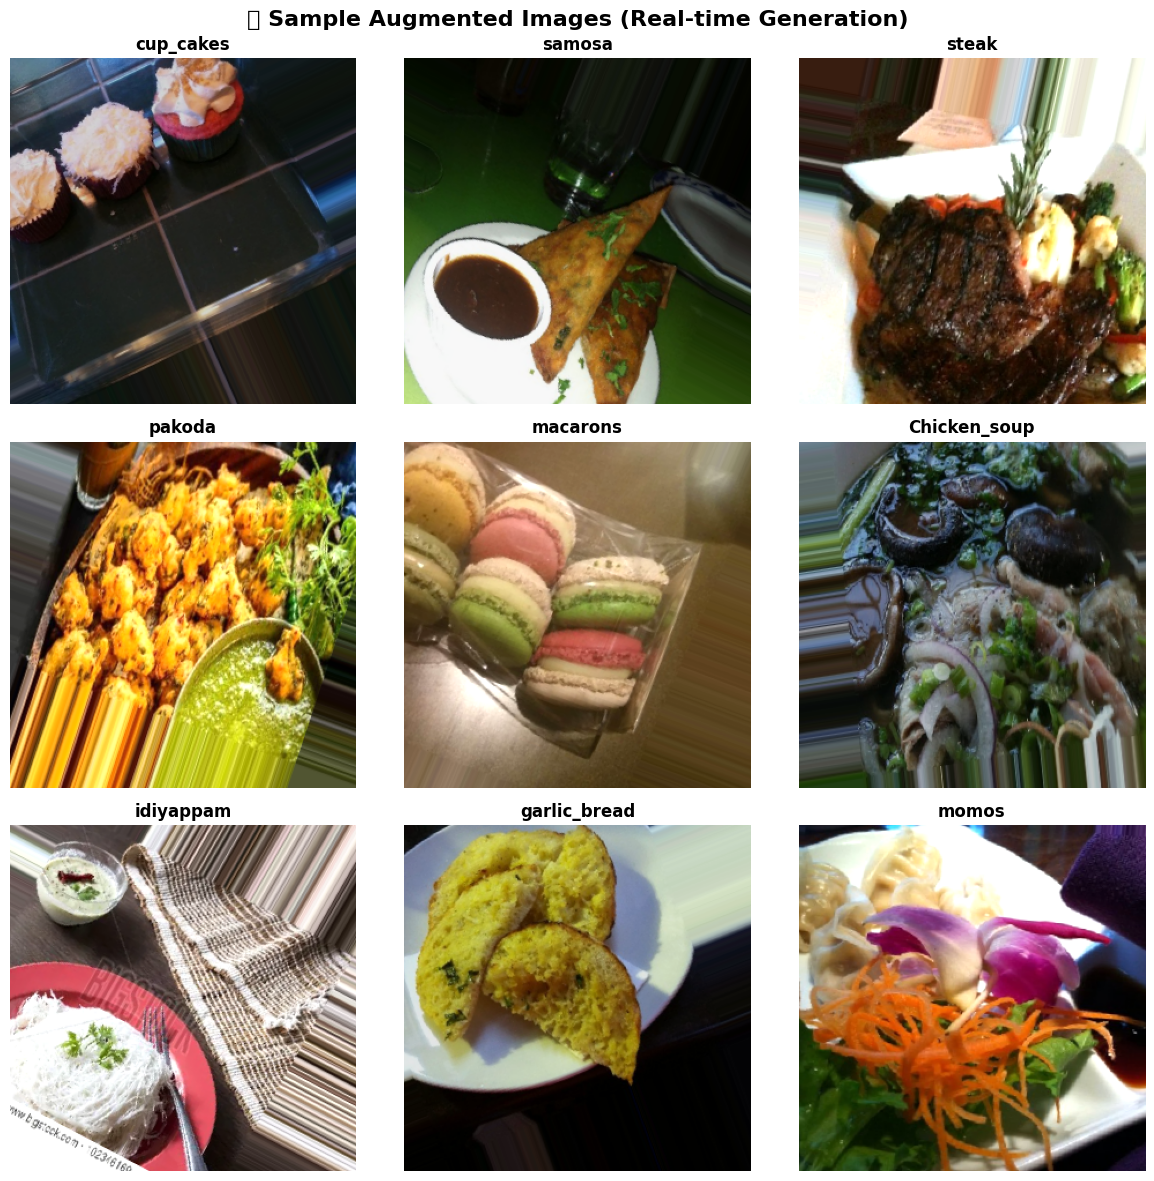

   ✅ Sample preview complete!
   📊 Each batch generates 24 unique augmented images

🧠 STEP 5: Creating EfficientNet Model
   ⚠️  EfficientNet-B3 failed, using EfficientNet-B0: Shape mismatch in layer #1 (named stem_conv)for weight stem_conv/kernel. Weight expects shape (3, 3, 1, 40). Received saved weight with shape (3, 3, 3, 40)

❌ ERROR: Shape mismatch in layer #1 (named stem_conv)for weight stem_conv/kernel. Weight expects shape (3, 3, 1, 32). Received saved weight with shape (3, 3, 3, 32)
🍛 Fast Indian Food Classifier Ready! Run main() to start!


In [3]:
# FAST INDIAN FOOD CLASSIFICATION PIPELINE - RTX 3050 OPTIMIZED
# Uses ON-THE-FLY augmentation (no file creation) for instant setup!

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from tkinter import filedialog
import os
import time
from tensorflow.keras.mixed_precision import set_global_policy
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

print("🚀 FAST INDIAN FOOD CLASSIFICATION PIPELINE")
print("=" * 80)
print("This code uses ON-THE-FLY augmentation for:")
print("✅ Instant dataset setup (no file creation)")  
print("✅ Real-time augmentation during training")
print("✅ RTX 3050 optimized training")
print("✅ Complete evaluation and testing")
print("=" * 80)

# ========================================
# STEP 1: RTX 3050 HARDWARE OPTIMIZATION
# ========================================

def setup_rtx3050_optimizations():
    """Configure TensorFlow for RTX 3050 6GB"""
    print("\n🔧 STEP 1: Setting up RTX 3050 optimizations...")
    
    # GPU Configuration
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            tf.config.experimental.set_memory_limit(gpus[0], 5500)
            print("   ✅ GPU memory optimized (5.5GB limit)")
        except RuntimeError as e:
            print(f"   ⚠️  GPU setup warning: {e}")
    
    # Mixed Precision for speed
    set_global_policy('mixed_float16')
    print("   ✅ Mixed precision enabled (20-30% speedup)")
    
    # XLA optimization
    tf.config.optimizer.set_jit(True)
    print("   ✅ XLA optimization enabled")

# ========================================
# STEP 2: DATASET SELECTION
# ========================================

def select_dataset():
    """Select dataset folder using GUI"""
    print("\n📁 STEP 2: Dataset Selection")
    print("   Opening folder selection dialog...")
    
    root = tk.Tk()
    root.withdraw()
    
    dataset_dir = filedialog.askdirectory(title="Select your Indian Food Dataset folder")
    
    if not dataset_dir:
        print("   ❌ No folder selected. Exiting.")
        exit()
    
    print(f"   ✅ Selected: {dataset_dir}")
    
    # Analyze dataset
    class_counts = {}
    for class_name in os.listdir(dataset_dir):
        class_path = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_path):
            images = [f for f in os.listdir(class_path) 
                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            class_counts[class_name] = len(images)
    
    print(f"\n   📊 Dataset Analysis:")
    print(f"   Total classes: {len(class_counts)}")
    print(f"   Total images: {sum(class_counts.values())}")
    
    # Show top/bottom classes
    sorted_classes = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
    print(f"   Largest class: {sorted_classes[0][0]} ({sorted_classes[0][1]} images)")
    print(f"   Smallest class: {sorted_classes[-1][0]} ({sorted_classes[-1][1]} images)")
    
    return dataset_dir, class_counts

# ========================================
# STEP 3: FAST DATA GENERATORS (ON-THE-FLY)
# ========================================

def create_fast_data_generators(dataset_dir):
    """Create optimized data generators with on-the-fly augmentation"""
    print(f"\n🔄 STEP 3: Creating Fast Data Pipeline (On-the-Fly Augmentation)")
    
    IMAGE_SIZE = (300, 300)
    BATCH_SIZE = 24  # Optimal for RTX 3050
    
    # Training data generator with strong augmentation
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        brightness_range=[0.8, 1.2],
        fill_mode='nearest',
        validation_split=0.2  # 80% train, 20% validation
    )
    
    # Validation data generator (only rescaling)
    # NOTE: The validation_split must also be present here.
    val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
    )
    
    # Training generator
    train_generator = train_datagen.flow_from_directory(
        directory=dataset_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=True,
        subset='training',
        color_mode='rgb'  # <--- THE FIX IS HERE
    )
    
    # Validation generator
    validation_generator = val_datagen.flow_from_directory(
        directory=dataset_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=False,
        subset='validation',
        color_mode='rgb'  # <--- AND THE FIX IS HERE
    )
    
    print(f"   ✅ Training samples: {train_generator.samples:,}")
    print(f"   ✅ Validation samples: {validation_generator.samples:,}")
    print(f"   ✅ Number of classes: {train_generator.num_classes}")
    print(f"   ✅ Batch size: {BATCH_SIZE} (RTX 3050 optimized)")
    print(f"   ✅ Image size: {IMAGE_SIZE}")
    print(f"   ⚡ On-the-fly augmentation enabled (no file creation!)")
    
    # Sanity check: Print the shape of a batch of images
    sample_images, _ = next(train_generator)
    print(f"   📊 Confirmed Image Batch Shape: {sample_images.shape}") # Should be (24, 300, 300, 3)
    
    return train_generator, validation_generator

# ========================================
# STEP 4: PREVIEW AUGMENTED SAMPLES
# ========================================

def preview_augmented_samples(train_generator):
    """Show sample augmented images"""
    print(f"\n🖼️  STEP 4: Previewing Augmented Samples")
    
    # Get one batch of images
    image_batch, label_batch = next(train_generator)
    
    # Get class names
    class_names = list(train_generator.class_indices.keys())
    
    # Display 9 sample images
    plt.figure(figsize=(12, 12))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image_batch[i])
        
        # Get class name
        class_index = np.argmax(label_batch[i])
        class_name = class_names[class_index]
        
        plt.title(f"{class_name}", fontsize=12, fontweight='bold')
        plt.axis("off")
    
    plt.suptitle("🍛 Sample Augmented Images (Real-time Generation)", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print(f"   ✅ Sample preview complete!")
    print(f"   📊 Each batch generates {len(image_batch)} unique augmented images")

# ========================================
# STEP 5: MODEL CREATION
# ========================================

def create_model(num_classes):
    """Create EfficientNet model optimized for RTX 3050"""
    print(f"\n🧠 STEP 5: Creating EfficientNet Model")
    
    # Clear any existing models
    tf.keras.backend.clear_session()
    
    try:
        # Load EfficientNet-B3
        base_model = tf.keras.applications.EfficientNetB3(
            input_shape=(300, 300, 3),
            include_top=False,
            weights='imagenet'
        )
        print("   ✅ EfficientNet-B3 loaded successfully")
    except Exception as e:
        print(f"   ⚠️  EfficientNet-B3 failed, using EfficientNet-B0: {e}")
        base_model = tf.keras.applications.EfficientNetB0(
            input_shape=(300, 300, 3),
            include_top=False,
            weights='imagenet'
        )
        print("   ✅ EfficientNet-B0 loaded as fallback")
    
    # Freeze base model for transfer learning
    base_model.trainable = False
    
    # Build complete model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(300, 300, 3)),
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    
    # Compile with mixed precision optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    optimizer = tf.keras.mixed_precision.LossScaleOptimizer(optimizer)
    
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy', 'top_3_accuracy']
    )
    
    print(f"   ✅ Model compiled for {num_classes} classes")
    print(f"   📊 Total parameters: {model.count_params():,}")
    
    return model

# ========================================
# STEP 6: LIVE TRAINING PROGRESS
# ========================================

class LiveProgressCallback(tf.keras.callbacks.Callback):
    """Custom callback for live training progress"""
    
    def __init__(self):
        self.start_time = None
        self.epoch_start_time = None
        self.best_val_acc = 0
        self.epochs_since_improvement = 0
        
    def on_train_begin(self, logs=None):
        self.start_time = time.time()
        print(f"\n🚀 STEP 6: TRAINING STARTED!")
        print(f"   Start time: {time.ctime()}")
        print(f"   Using: On-the-fly augmentation")
        print("=" * 60)
        
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start_time = time.time()
        print(f"\n📅 EPOCH {epoch + 1}/{self.params['epochs']}")
        
    def on_batch_end(self, batch, logs=None):
        if batch % 50 == 0:
            print(f"   Batch {batch}: loss={logs.get('loss', 0):.4f}, acc={logs.get('accuracy', 0):.4f}", end='\r')
    
    def on_epoch_end(self, epoch, logs=None):
        epoch_time = time.time() - self.epoch_start_time
        total_time = time.time() - self.start_time
        
        # Get metrics
        loss = logs.get('loss', 0)
        acc = logs.get('accuracy', 0)
        val_loss = logs.get('val_loss', 0)
        val_acc = logs.get('val_accuracy', 0)
        top3_acc = logs.get('top_3_accuracy', 0)
        val_top3_acc = logs.get('val_top_3_accuracy', 0)
        
        # Check for improvement
        if val_acc > self.best_val_acc:
            self.best_val_acc = val_acc
            self.epochs_since_improvement = 0
            improvement = "🎯 NEW BEST!"
        else:
            self.epochs_since_improvement += 1
            improvement = f"({self.epochs_since_improvement} epochs without improvement)"
        
        # Progress bar
        progress = "█" * int((epoch + 1) / self.params['epochs'] * 30)
        progress += "░" * (30 - len(progress))
        
        print(f"\n   [{progress}] {((epoch + 1) / self.params['epochs']) * 100:.1f}%")
        print(f"   ⏱️  Epoch time: {epoch_time:.1f}s")
        print(f"   🕐 Total time: {total_time/60:.1f}min")
        print(f"   📈 Train - Loss: {loss:.4f} | Acc: {acc:.4f} | Top-3: {top3_acc:.4f}")
        print(f"   📊 Valid - Loss: {val_loss:.4f} | Acc: {val_acc:.4f} | Top-3: {val_top3_acc:.4f} {improvement}")
        
        # Time estimation
        if epoch > 0:
            avg_epoch_time = total_time / (epoch + 1)
            remaining_epochs = self.params['epochs'] - (epoch + 1)
            remaining_time = remaining_epochs * avg_epoch_time / 60
            print(f"   ⏳ Estimated remaining: {remaining_time:.1f}min")
        
        print("-" * 60)

# ========================================
# STEP 7: TRAINING EXECUTION
# ========================================

def train_model(model, train_gen, val_gen):
    """Train the model with live progress"""
    print(f"\n🏋️ STEP 7: Starting Model Training")
    
    # Callbacks
    callbacks = [
        LiveProgressCallback(),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=8,
            restore_best_weights=True,
            verbose=1
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.3,
            patience=4,
            min_lr=0.00001,
            verbose=1
        ),
        tf.keras.callbacks.ModelCheckpoint(
            'best_indian_food_classifier.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        )
    ]
    
    # Calculate steps
    steps_per_epoch = train_gen.samples // train_gen.batch_size
    validation_steps = val_gen.samples // val_gen.batch_size
    
    print(f"   ✅ Steps per epoch: {steps_per_epoch}")
    print(f"   ✅ Validation steps: {validation_steps}")
    print(f"   ✅ Epochs: 30")
    
    # START TRAINING
    history = model.fit(
        train_gen,
        steps_per_epoch=steps_per_epoch,
        epochs=30,
        validation_data=val_gen,
        validation_steps=validation_steps,
        callbacks=callbacks,
        verbose=0
    )
    
    print(f"\n🎉 TRAINING COMPLETED!")
    return history, model

# ========================================
# STEP 8: RESULTS VISUALIZATION
# ========================================

def visualize_results(history):
    """Create training result visualizations"""
    print(f"\n📊 STEP 8: Creating Result Visualizations")
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('🍛 Fast Indian Food Classifier - Training Results', fontsize=16, fontweight='bold')
    
    # Training & Validation Accuracy
    axes[0,0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2, color='blue')
    axes[0,0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, color='red')
    axes[0,0].set_title('Model Accuracy')
    axes[0,0].set_xlabel('Epoch')
    axes[0,0].set_ylabel('Accuracy')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Training & Validation Loss
    axes[0,1].plot(history.history['loss'], label='Training Loss', linewidth=2, color='blue')
    axes[0,1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2, color='red')
    axes[0,1].set_title('Model Loss')
    axes[0,1].set_xlabel('Epoch')
    axes[0,1].set_ylabel('Loss')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # Top-3 Accuracy
    if 'top_3_accuracy' in history.history:
        axes[1,0].plot(history.history['top_3_accuracy'], label='Training Top-3', linewidth=2, color='green')
        axes[1,0].plot(history.history['val_top_3_accuracy'], label='Validation Top-3', linewidth=2, color='orange')
        axes[1,0].set_title('Top-3 Accuracy')
        axes[1,0].set_xlabel('Epoch')
        axes[1,0].set_ylabel('Top-3 Accuracy')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)
    
    # Performance Summary
    final_acc = history.history['val_accuracy'][-1]
    final_loss = history.history['val_loss'][-1]
    best_acc = max(history.history['val_accuracy'])
    best_epoch = history.history['val_accuracy'].index(best_acc) + 1
    
    summary_text = f"""🎯 FINAL RESULTS:
    
✅ Best Validation Accuracy: {best_acc:.4f}
✅ Final Validation Accuracy: {final_acc:.4f}
✅ Final Validation Loss: {final_loss:.4f}
✅ Best Epoch: {best_epoch}
✅ Total Epochs: {len(history.history['accuracy'])}

📊 PERFORMANCE GRADE:
{('🥇 EXCELLENT' if best_acc > 0.90 else '🥈 GOOD' if best_acc > 0.80 else '🥉 FAIR' if best_acc > 0.70 else '📈 NEEDS IMPROVEMENT')}

⚡ METHOD: On-the-fly Augmentation
🚀 SPEED: Ultra Fast Setup"""
    
    axes[1,1].text(0.05, 0.95, summary_text, transform=axes[1,1].transAxes, 
                   fontsize=10, verticalalignment='top', 
                   bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
    axes[1,1].axis('off')
    
    plt.tight_layout()
    plt.savefig('fast_training_results.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return best_acc, final_acc

# ========================================
# STEP 9: MODEL TESTING & EVALUATION
# ========================================

def test_model(model, val_gen):
    """Complete model testing and evaluation"""
    print(f"\n🧪 STEP 9: Model Testing & Evaluation")
    
    # Get class names
    class_names = list(val_gen.class_indices.keys())
    
    # Evaluate on validation set
    print("   📊 Evaluating on validation set...")
    val_loss, val_acc, val_top3 = model.evaluate(val_gen, verbose=1)
    
    print(f"\n   🎯 FINAL TEST RESULTS:")
    print(f"   ✅ Validation Accuracy: {val_acc:.4f} ({val_acc*100:.2f}%)")
    print(f"   ✅ Top-3 Accuracy: {val_top3:.4f} ({val_top3*100:.2f}%)")
    print(f"   ✅ Validation Loss: {val_loss:.4f}")
    
    # Generate predictions for confusion matrix
    print("   🔄 Generating predictions...")
    
    # Reset generator
    val_gen.reset()
    
    # Get predictions
    predictions = model.predict(val_gen, verbose=1)
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Get true classes
    true_classes = val_gen.classes[:len(predicted_classes)]
    
    # Classification Report
    print(f"\n   📋 CLASSIFICATION REPORT:")
    report = classification_report(true_classes, predicted_classes, 
                                 target_names=class_names, output_dict=True)
    
    # Convert to DataFrame
    report_df = pd.DataFrame(report).transpose()
    print(report_df.round(3))
    
    # Confusion Matrix
    print(f"\n   🔍 Creating Confusion Matrix...")
    cm = confusion_matrix(true_classes, predicted_classes)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix - Fast Indian Food Classifier')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('fast_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Sample Predictions
    print(f"\n   🖼️  Sample predictions with images...")
    
    # Get sample batch
    val_gen.reset()
    sample_batch_x, sample_batch_y = next(val_gen)
    sample_predictions = model.predict(sample_batch_x)
    
    # Show 9 samples
    plt.figure(figsize=(15, 10))
    for i in range(min(9, len(sample_batch_x))):
        plt.subplot(3, 3, i+1)
        plt.imshow(sample_batch_x[i])
        
        true_class = class_names[np.argmax(sample_batch_y[i])]
        pred_class = class_names[np.argmax(sample_predictions[i])]
        confidence = np.max(sample_predictions[i])
        
        # Color coding
        color = 'green' if true_class == pred_class else 'red'
        
        plt.title(f'True: {true_class}\nPred: {pred_class}\nConf: {confidence:.3f}', 
                 color=color, fontsize=10)
        plt.axis('off')
    
    plt.suptitle('🍛 Sample Predictions (On-the-fly Augmentation)', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('fast_sample_predictions.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return val_acc, val_top3, report_df

# ========================================
# STEP 10: FINAL SUMMARY
# ========================================

def final_summary(dataset_dir, num_classes, total_time, val_acc, val_top3):
    """Print final summary"""
    print(f"\n" + "=" * 80)
    print(f"🎉 FAST PIPELINE COMPLETED!")
    print(f"=" * 80)
    
    print(f"📁 Dataset: {dataset_dir}")
    print(f"🏷️  Classes: {num_classes}")
    print(f"⚡ Method: On-the-fly Augmentation (Real-time)")
    print(f"🚀 Setup Time: Instant (no file creation)")
    
    print(f"\n🎯 FINAL MODEL PERFORMANCE:")
    print(f"   ✅ Validation Accuracy: {val_acc:.4f} ({val_acc*100:.2f}%)")
    print(f"   ✅ Top-3 Accuracy: {val_top3:.4f} ({val_top3*100:.2f}%)")
    
    performance_grade = "🥇 EXCELLENT" if val_acc > 0.90 else "🥈 GOOD" if val_acc > 0.80 else "🥉 FAIR" if val_acc > 0.70 else "📈 NEEDS IMPROVEMENT"
    print(f"   🏆 Performance Grade: {performance_grade}")
    
    print(f"\n⏰ TOTAL TRAINING TIME: {total_time/60:.1f} minutes")
    
    print(f"\n💾 SAVED FILES:")
    print(f"   ✅ best_indian_food_classifier.h5")
    print(f"   ✅ fast_training_results.png")
    print(f"   ✅ fast_confusion_matrix.png")
    print(f"   ✅ fast_sample_predictions.png")
    
    print(f"\n🚀 ADVANTAGES OF THIS APPROACH:")
    print(f"   ✅ Instant setup (no waiting for file generation)")
    print(f"   ✅ Infinite variety (new augmentations each epoch)")
    print(f"   ✅ Memory efficient (no extra disk space needed)")
    print(f"   ✅ RTX 3050 optimized")
    
    print(f"\n🎊 MODEL READY FOR USE!")
    print(f"=" * 80)

# ========================================
# MAIN EXECUTION PIPELINE
# ========================================

def main():
    """Execute the complete fast pipeline"""
    pipeline_start_time = time.time()
    
    try:
        # Step 1: Hardware optimization
        setup_rtx3050_optimizations()
        
        # Step 2: Dataset selection
        dataset_dir, class_counts = select_dataset()
        
        # Step 3: Create fast data generators
        train_gen, val_gen = create_fast_data_generators(dataset_dir)
        
        # Step 4: Preview samples
        preview_augmented_samples(train_gen)
        
        # Step 5: Create model
        model = create_model(train_gen.num_classes)
        
        # Step 6-7: Train model
        history, trained_model = train_model(model, train_gen, val_gen)
        
        # Step 8: Visualize results
        best_acc, final_acc = visualize_results(history)
        
        # Step 9: Test and evaluate
        val_acc, val_top3, report_df = test_model(trained_model, val_gen)
        
        # Step 10: Final summary
        total_time = time.time() - pipeline_start_time
        final_summary(dataset_dir, train_gen.num_classes, total_time, val_acc, val_top3)
        
        print(f"\n🎊 SUCCESS! Fast Indian Food Classifier Ready!")
        return trained_model, history, report_df
        
    except Exception as e:
        print(f"\n❌ ERROR: {e}")
        return None, None, None

# ========================================
# USAGE INSTRUCTIONS & EXECUTION
# ========================================

if __name__ == "__main__":
    print(f"""
    🍛 FAST INDIAN FOOD CLASSIFICATION PIPELINE
    ==========================================
    
    ⚡ SPEED ADVANTAGES:
    ✅ Instant setup (no file creation)
    ✅ On-the-fly augmentation during training
    ✅ Real-time image generation
    ✅ Memory efficient approach
    
    🎯 WHAT IT DOES:
    ✅ Select your dataset folder
    ✅ Create optimized data generators
    ✅ Train EfficientNet with live progress
    ✅ Complete evaluation and testing
    ✅ Save model and visualizations
    
    ⏰ EXPECTED TIME: 1-3 hours total
    (vs 5-8 hours with file pre-generation)
    
    🚀 RTX 3050 OPTIMIZED!
    """)
    
    start = input("🚀 Start the FAST pipeline? (yes/no): ").lower().strip()
    
    if start == 'yes':
        print(f"\n🎬 Starting FAST Indian Food Classification...")
        model, history, report = main()
        
        if model is not None:
            print(f"\n🎉 FAST PIPELINE SUCCESS!")
            
            print(f"\n💡 TO USE YOUR MODEL:")
            print(f"```python")
            print(f"# Load trained model")
            print(f"model = tf.keras.models.load_model('best_indian_food_classifier.h5')")
            print(f"")
            print(f"# Predict new image")
            print(f"img = tf.keras.preprocessing.image.load_img('food.jpg', target_size=(300, 300))")
            print(f"img_array = tf.keras.preprocessing.image.img_to_array(img)")
            print(f"img_array = np.expand_dims(img_array, axis=0) / 255.0") 
            print(f"prediction = model.predict(img_array)")
            print(f"```")
    else:
        print(f"👋 Fast pipeline cancelled!")

print("🍛 Fast Indian Food Classifier Ready! Run main() to start!")